In [37]:
# Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from IPython.display import Image

# Plotly
import plotly_express as px
import plotly as py
import plotly.graph_objects as go

# Set maximum number of columns and column width for pandas
pd.set_option('display.max_columns', 85)
pd.set_option('max_colwidth', 400)
# Set global plotting parameters
rcParams['font.size'] = 18
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Arial'
rcParams['axes.spines.right'] = 'False'
rcParams['axes.spines.top'] = 'False'

In [2]:
# Import the data
df = pd.read_csv('survey_results_public.csv')

### 1. Inspect the data

In [3]:
# Display first five rows
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software is about the same,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or tool without taking a formal course",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a job board","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Courses on technologies you're interested in,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software is about the same,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,Taken an online course in programming or software development (e.g. a MOOC),NaN,"Developer, desktop or enterprise applications;Developer, front-end",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,"Financial performance or funding status of the company or organization;Specific department or team I'd be working on;Languages, frameworks, and other technologies I'd be working with","Something else changed (education, award, media, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change many aspects of our lives,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board but have never used or visited it","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses on technologies you're interested in,19.0,Man,No,Straight / Heterosexual,NaN,No,

In [4]:
# Number of rows and columns in df
df.shape

(88883, 85)

In [5]:
# Display data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              88883 non-null  int64  
 1   MainBranch              88331 non-null  object 
 2   Hobbyist                88883 non-null  object 
 3   OpenSourcer             88883 non-null  object 
 4   OpenSource              86842 non-null  object 
 5   Employment              87181 non-null  object 
 6   Country                 88751 non-null  object 
 7   Student                 87014 non-null  object 
 8   EdLevel                 86390 non-null  object 
 9   UndergradMajor          75614 non-null  object 
 10  EduOther                84260 non-null  object 
 11  OrgSize                 71791 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               87938 non-null  object 
 14  Age1stCode              87634 non-null

In [6]:
# Summary of numeric columns
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [8]:
# Check the number of nan rows per columns
print(df.isna().sum().sort_values(ascending = False).nlargest(10))

BlockchainOrg         40708
CodeRevHrs            39093
ConvertedComp         33060
CompTotal             32938
MiscTechWorkedWith    29297
BlockchainIs          28718
PurchaseHow           27775
MgrMoney              27726
MgrIdiot              27724
MgrWant               27651
dtype: int64


In [9]:
# Number of unique / different values / answers / categories per column
df.nunique().sort_values(ascending = False).nlargest(10)

Respondent                88883
LanguageDesireNextYear    27259
LanguageWorkedWith        20098
DevType                   13141
PlatformDesireNextYear    10795
ConvertedComp              9162
PlatformWorkedWith         8731
DevEnviron                 7716
MiscTechDesireNextYear     5565
CompTotal                  4198
dtype: int64

### 2. Data exploration

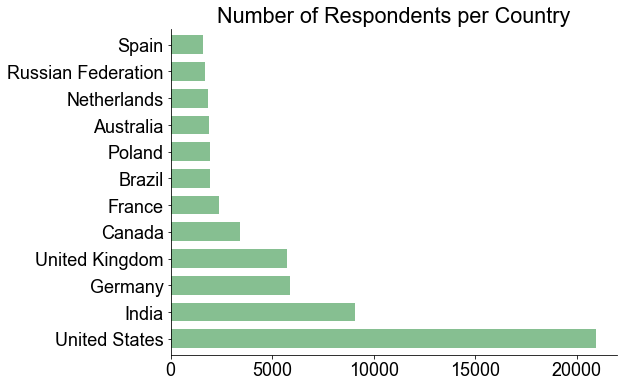

In [11]:
# Plot top 12 countries with most respondents
df['Country'].value_counts()[:12].plot.barh(color='#86bf91', width=0.7, figsize=(8,6))
plt.title('Number of Respondents per Country')
plt.show()

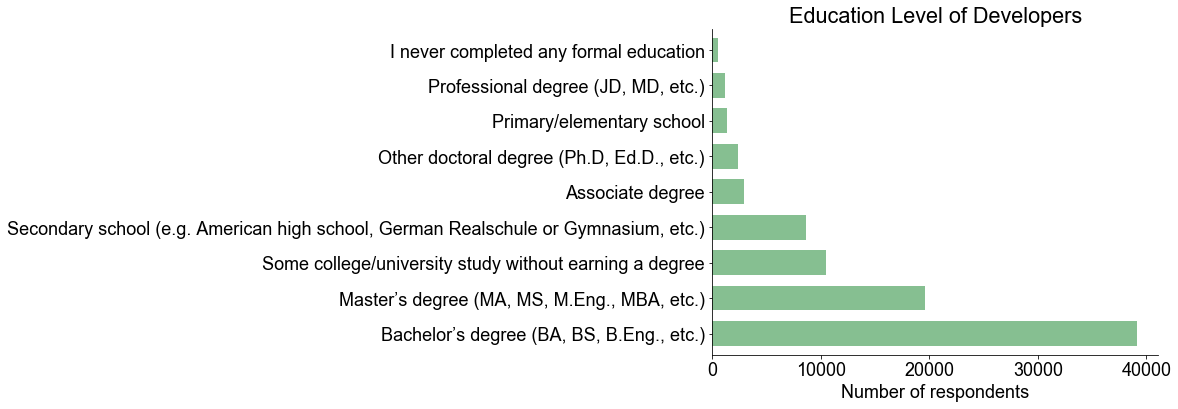

In [12]:
# Plot number of developers by education level
df['EdLevel'].value_counts().plot.barh(color='#86bf91', width=0.7, figsize=(8,6))
plt.title('Education Level of Developers')
plt.xlabel('Number of respondents')
plt.show()

In [13]:
# Summarise number of respondents per education level
df_group = df.groupby(['EdLevel'])['Respondent'].count().sort_values(ascending=False).reset_index()
# Add column with percentages of respondents per education level
df_group['EdLevel_pc'] = round((df_group['Respondent'] * 100) / df_group['Respondent'].sum(axis=0), 1)
df_group

,EdLevel,Respondent,EdLevel_pc
0,"Bachelor’s degree (BA, BS, B.Eng., etc.)",39134,45.3
1,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",19569,22.7
2,Some college/university study without earning a degree,10502,12.2
3,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",8642,10.0
4,Associate degree,2938,3.4
5,"Other doctoral degree (Ph.D, Ed.D., etc.)",2432,2.8
6,Primary/elementary school,1422,1.6
7,"Professional degree (JD, MD, etc.)",1198,1.4
8,I never completed any formal education,553,0.6


In [14]:
# Define custom color palette
colors = ['lightskyblue', 'gold', 'lightcoral', 'gainsboro', 'royalblue', 'lightpink', 'darkseagreen', 'sienna', 'khaki', 'gold', 'violet', 'yellowgreen']
customPalette = sns.set_palette(sns.color_palette(colors))

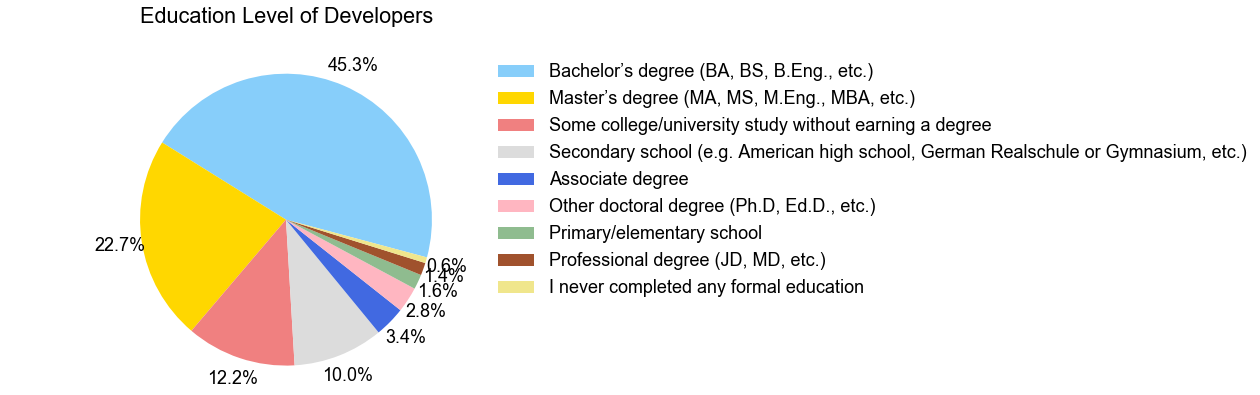

In [15]:
# Plot percentage of developers by education level
fig1, ax1 = plt.subplots(figsize=(10,6))
plt.pie(df_group['Respondent'], autopct = '%.1f%%', colors = colors,
        shadow = False, startangle = 345, # turn pie 345 degrees
        pctdistance = 1.15) # pct label distance
plt.title('Education Level of Developers', y = 1.08)
plt.legend(df_group['EdLevel'].to_list(), loc = 'upper right', bbox_to_anchor = (2.25,1.025), frameon=False)
ax1.axis('equal')
plt.show()

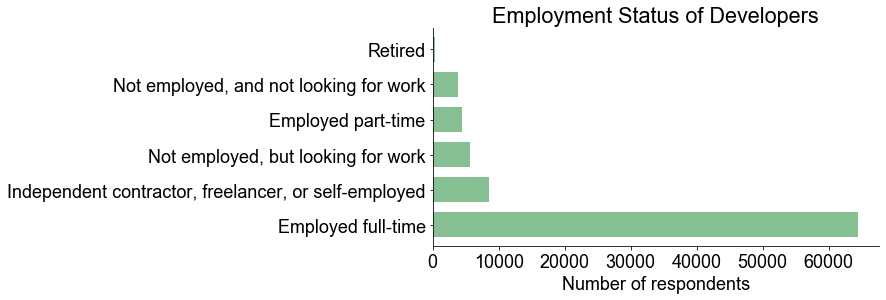

In [16]:
# Plot employment status of developers
df['Employment'].value_counts().plot.barh(color='#86bf91', width=0.7, figsize=(8,4))
plt.title('Employment Status of Developers')
plt.xlabel('Number of respondents')
plt.show()

In [17]:
# Summarise number of respondents per education level
df_group = df.groupby(['Employment'])['Respondent'].count().sort_values(ascending=False).reset_index()
# Add column with percentages of respondents per education level
df_group['Employment_pc'] = round((df_group['Respondent'] * 100) / df_group['Respondent'].sum(axis=0), 1)
df_group

,Employment,Respondent,Employment_pc
0,Employed full-time,64440,73.9
1,"Independent contractor, freelancer, or self-employed",8511,9.8
2,"Not employed, but looking for work",5600,6.4
3,Employed part-time,4469,5.1
4,"Not employed, and not looking for work",3803,4.4
5,Retired,358,0.4


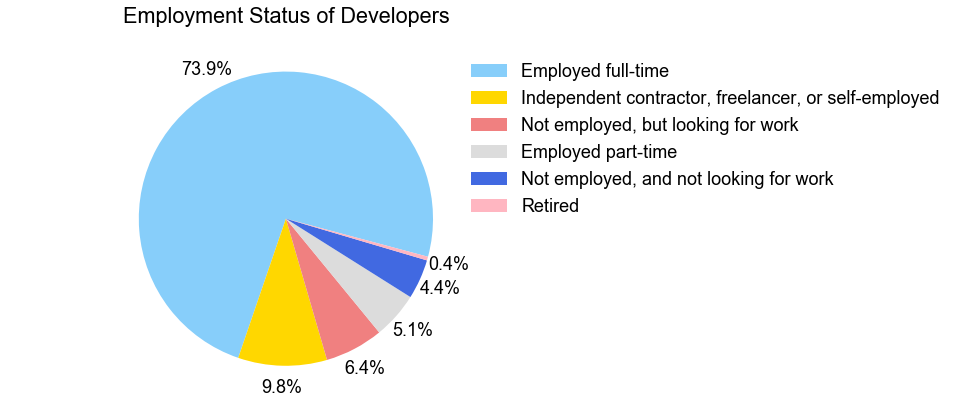

In [18]:
# Plot percentage of respondents per education level
fig1, ax1 = plt.subplots(figsize=(10,6))
plt.pie(df_group['Respondent'], autopct = '%.1f%%', colors = colors,
        shadow = False, startangle = 345, # turn pie 345 degrees
        pctdistance = 1.15) # pct label distance
plt.title('Employment Status of Developers', y = 1.08)
plt.legend(df_group['Employment'].to_list(), loc = 'upper right', bbox_to_anchor = (1.7,1.025), frameon=False)
ax1.axis('equal')
plt.show()

## What is the Educational Background of Developers?

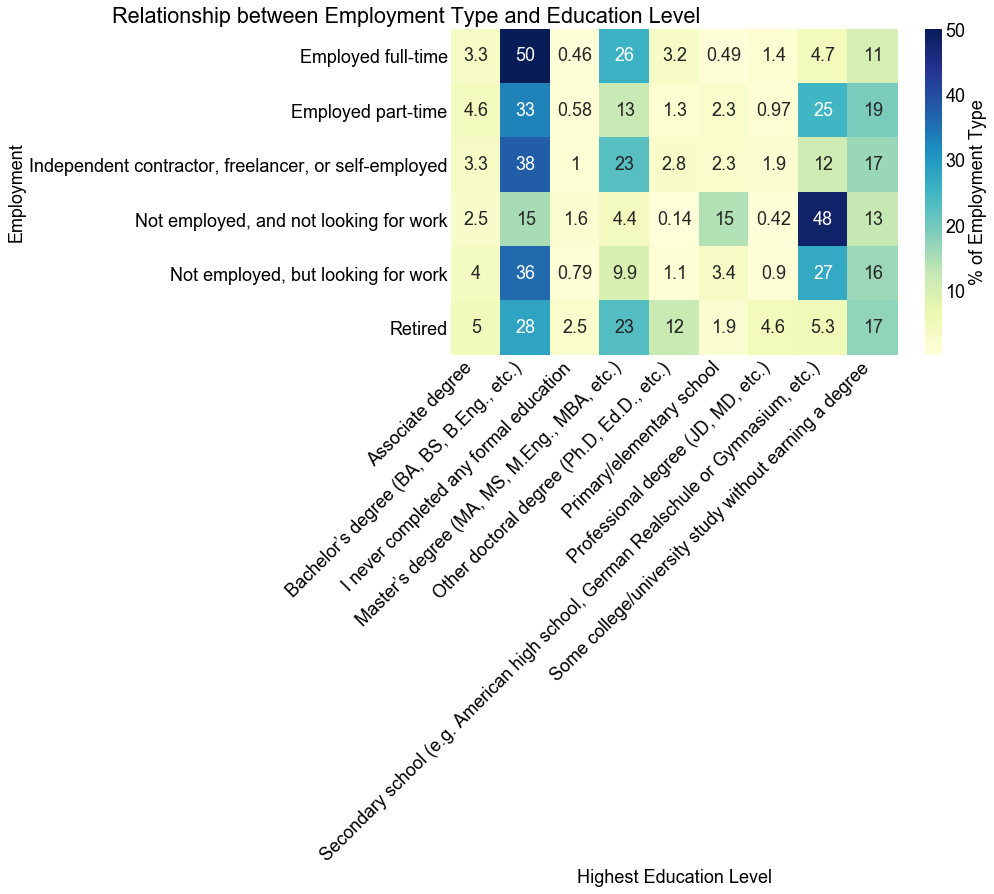

In [19]:
# Relationship between employment type and highest education level
rcParams['font.size'] = 18
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Arial'
rcParams['xtick.major.size'] = False
rcParams['ytick.major.size'] = False

# Crosstab as heatmap
# Normalise to precent per row
edu_eplm = pd.crosstab(df['Employment'], df['EdLevel'], normalize='index').round(4)*100

f, ax = plt.subplots(figsize=(10, 6))

ax = sns.heatmap(edu_eplm, cmap='YlGnBu', annot=True, cbar_kws={'label': "% of Employment Type"})
plt.title('Relationship between Employment Type and Education Level', x=-0.1)
plt.xlabel('Highest Education Level')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right');

Except for developers who are unemployed and don't seek new eomplyment, BSc is the most common degree of developers.

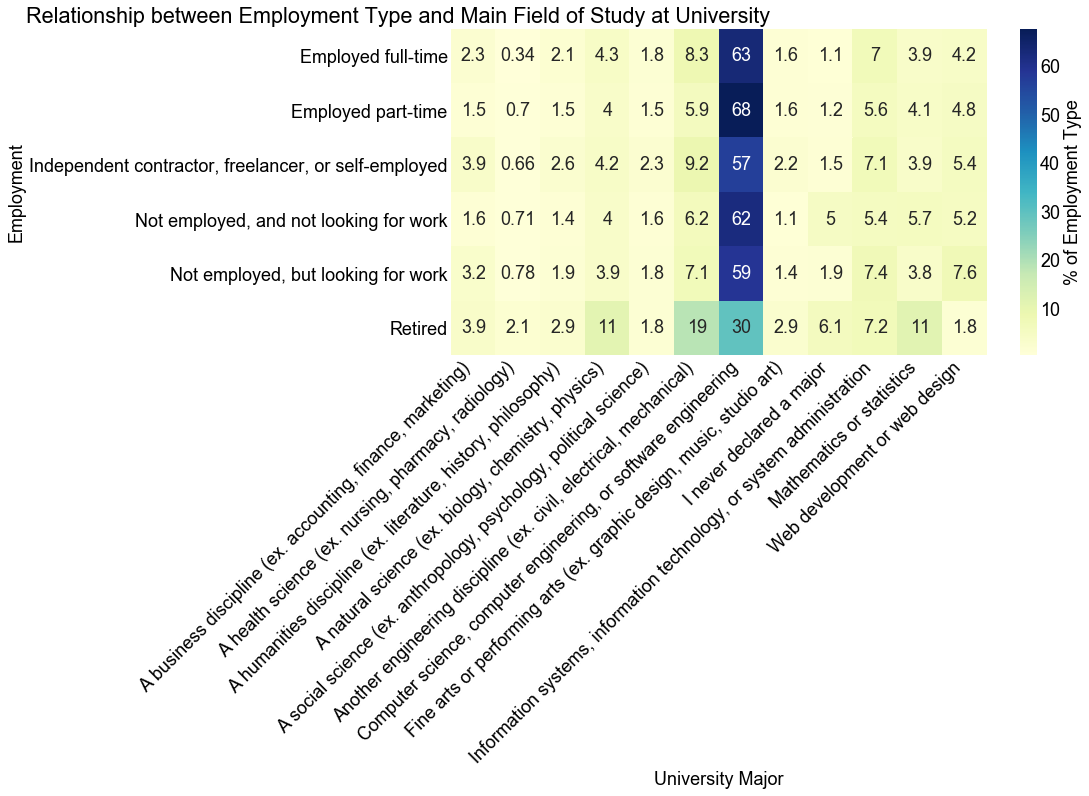

In [20]:
# Relationship between employment type and main field of study at university
rcParams['font.size'] = 18
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Arial'
rcParams['xtick.major.size'] = False
rcParams['ytick.major.size'] = False

# Crosstab as heatmap
# Normalise to precent per row
edu_eplm = pd.crosstab(df['Employment'], df['UndergradMajor'], normalize='index').round(4)*100

f, ax = plt.subplots(figsize=(12, 6))

ax = sns.heatmap(edu_eplm, cmap='YlGnBu', annot=True, cbar_kws={'label': "% of Employment Type"})
plt.title('Relationship between Employment Type and Main Field of Study at University', x=-0.1)
plt.xlabel('University Major')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right');

Across all eomployment types the majority of developers studied computer science or software engineering at university.

In [21]:
# Types of developers in survey
df['MainBranch'].unique()

array(['I am a student who is learning to code',
       'I am not primarily a developer, but I write code sometimes as part of my work',
       'I am a developer by profession', 'I code primarily as a hobby',
       'I used to be a developer by profession, but no longer am', nan],
      dtype=object)

The respondents of the survey have various types of roles such as students, hobbyists, retired developers, professional developers and other profesions. The survey answers given might be biased by the type of professions the responents have. Therefore, the analyses below will be restricted to professional developers in order to indetify trends withon a homogeneous groupd.

In [22]:
# Select profesional developers
df_prof = df[df['MainBranch'] == 'I am a developer by profession']
df_prof.shape

(65679, 85)

## What is the Average Salary of Professional Developers across Countries?

For some countries there are only one or few respondents. The average salary for these countries would not be representative. Therefore, I will focus on countries with a large number of repsondents.

In [23]:
# Create df with number of prefessional developers grouped by country 
df_salary = df_prof.groupby(['Country'])['Respondent'].count().sort_values(ascending=False).reset_index()
# Select the top 25 countries with the most respondents and convert to list
country_lst = df_salary['Country'][:25].to_list()
country_lst

['United States',
 'India',
 'United Kingdom',
 'Germany',
 'Canada',
 'France',
 'Brazil',
 'Poland',
 'Australia',
 'Netherlands',
 'Russian Federation',
 'Spain',
 'Italy',
 'Sweden',
 'Israel',
 'Switzerland',
 'Ukraine',
 'Turkey',
 'Pakistan',
 'Austria',
 'Iran',
 'Romania',
 'Czech Republic',
 'Belgium',
 'Bulgaria']

In [24]:
# Create df containing only developers from the top 25 countries with the most respondents
country_sub = df_prof[df_prof['Country'].isin(country_lst)]
country_sub.shape

(52853, 85)

In [25]:
# Group median salary by country sort decreasingly by salary
country_sub_med = country_sub.groupby(['Country'])['ConvertedComp'].median().sort_values(ascending=False).reset_index()
# Create list of countries in the order of dcreasing median salary
plot_order = country_sub_med['Country'].to_list()
plot_order

['United States',
 'Switzerland',
 'Israel',
 'Australia',
 'Canada',
 'United Kingdom',
 'Germany',
 'Netherlands',
 'Sweden',
 'Austria',
 'Belgium',
 'France',
 'Spain',
 'Czech Republic',
 'Italy',
 'Poland',
 'Romania',
 'Ukraine',
 'Bulgaria',
 'Russian Federation',
 'Turkey',
 'Brazil',
 'Iran',
 'India',
 'Pakistan']

(1.0, 10000000.0)

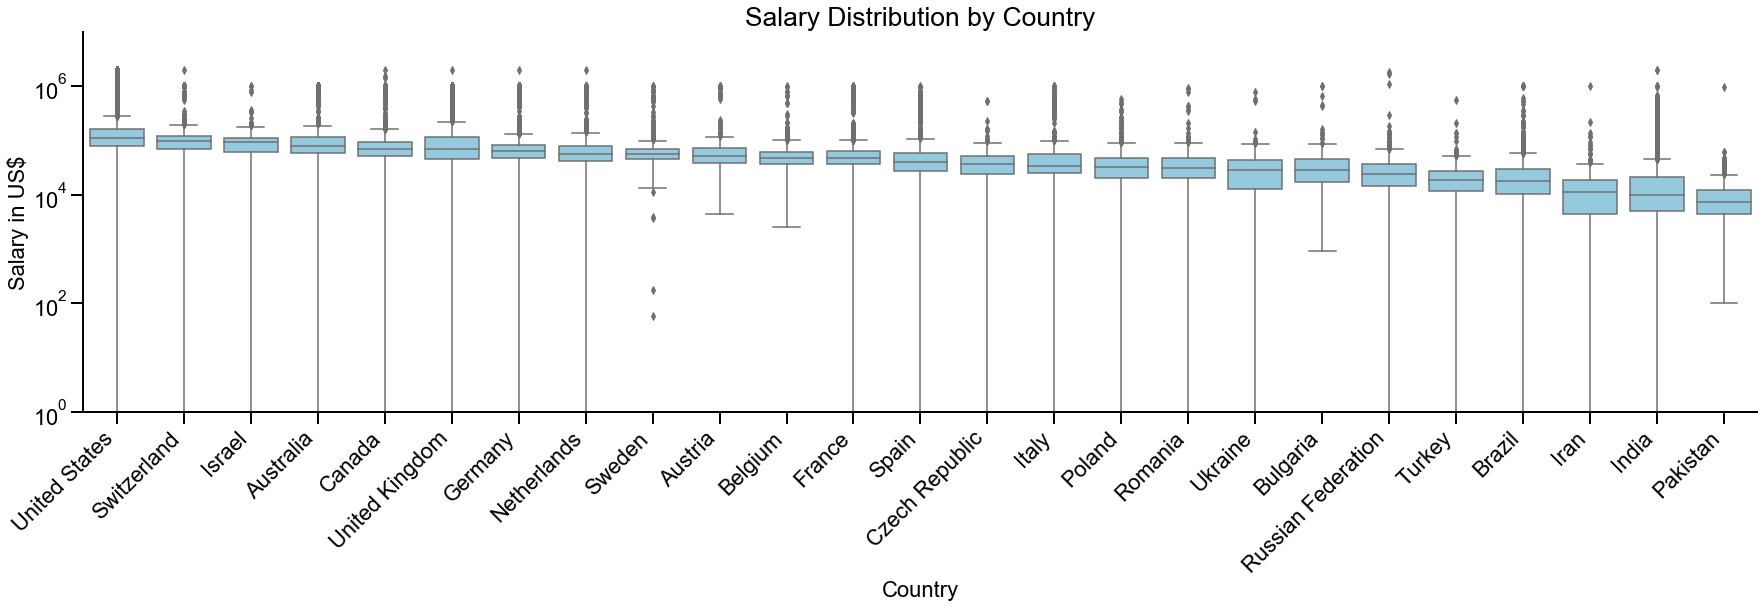

In [26]:
# Create boxplot showing median salary of professional developers for the top 25 countries with the most respondents

plt.rcParams['font.size'] = 22
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['axes.linewidth'] = 2

f, ax = plt.subplots(figsize=(30,7))

# Create plot
ax = sns.boxplot(x='Country',
               y='ConvertedComp',
               data=country_sub,
            #    inner = None, # Remove the bars inside the violins
               order=plot_order,
               color='skyblue')

ax.set_xlabel('Country')
ax.set_ylabel('Salary in US$')
ax.set_title('Salary Distribution by Country')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
ax.tick_params(direction = 'out', length = 12, width = 2)
plt.yscale('log')
plt.ylim(1e0, 1e7)

## What is the Relationship of Developer Type, Years of Coding Experience and Salary?

In [27]:
# Values in 'YearsCodePro' column
df_prof['YearsCodePro'].unique()

array(['Less than 1 year', '9', '4', '10', '8', '2', '3', '13', '18', '1',
       '5', '14', '22', '23', '19', '20', '25', '7', '15', '27', '48',
       '12', '35', '31', '11', '6', '17', '16', '21', nan, '30', '26',
       '33', '37', '40', '29', '28', '34', '24', '39', '38', '36', '32',
       '45', '43', '44', '42', '41', 'More than 50 years', '46', '49',
       '50', '47'], dtype=object)

The data type of the YearsCodePro column is string. It contains two strings ('Less than 1 year' and 'More than 50 years') which can't be converted into numeric values. Assign numeric values to these two strings so that these records can be used in the analysis.

In [28]:
# Replace strings in ['YearsCodePro'] column
df_prof_code = df_prof.copy()
df_prof_code['YearsCodePro'] = df_prof_code['YearsCodePro'].replace(['Less than 1 year', 'More than 50 years'], [0, 51])
df_prof_code['YearsCodePro'].unique()

array([0, '9', '4', '10', '8', '2', '3', '13', '18', '1', '5', '14', '22',
       '23', '19', '20', '25', '7', '15', '27', '48', '12', '35', '31',
       '11', '6', '17', '16', '21', nan, '30', '26', '33', '37', '40',
       '29', '28', '34', '24', '39', '38', '36', '32', '45', '43', '44',
       '42', '41', 51, '46', '49', '50', '47'], dtype=object)

In [29]:
# Recast 'ConvertedComp' as numeric
df_prof_code['YearsCodePro'] = pd.to_numeric(df_prof_code['YearsCodePro'])
# Check data type of 'ConvertedComp' column
df_prof_code['YearsCodePro'].dtypes

dtype('float64')

In [30]:
# Remove rows without data in 'DevType', 'YearsCodePro', 'ConvertedComp' columns
df_prof_code_sal = df_prof_code.dropna(subset=['DevType', 'YearsCodePro', 'ConvertedComp'])

In [31]:
# Split each developer role for each individual repsondant into seperate rows
df_prof_code_sal_stack = df_prof_code_sal.set_index(['Respondent','YearsCodePro','ConvertedComp'])['DevType'].str.split(';', expand=True).stack().reset_index(['Respondent','YearsCodePro','ConvertedComp'])
# Rename columns
df_prof_code_sal_stack.columns = ['Respondent','YearsCodePro','ConvertedComp','DevType']
df_prof_code_sal_stack[:20]

,Respondent,YearsCodePro,ConvertedComp,DevType
0,4,0.0,61000.0,"Developer, full-stack"
0,9,4.0,95179.0,Database administrator
1,9,4.0,95179.0,"Developer, back-end"
2,9,4.0,95179.0,"Developer, front-end"
3,9,4.0,95179.0,"Developer, full-stack"
4,9,4.0,95179.0,"Developer, QA or test"
5,9,4.0,95179.0,DevOps specialist
0,10,10.0,13293.0,Data or business analyst
1,10,10.0,13293.0,Data scientist or machine learning specialist
2,10,10.0,13293.0,Database administrator


In [32]:
# Create data frame with number of respondents, median years professional coding experience and median salary grouped by developer type
prof_code_sal_group = df_prof_code_sal_stack.groupby(['DevType']).agg({
    'Respondent': 'count',
    'YearsCodePro': 'median',
    'ConvertedComp': 'median'}).reset_index()
prof_code_sal_group

,DevType,Respondent,YearsCodePro,ConvertedComp
0,Academic researcher,2330,5.0,35538.0
1,Data or business analyst,2981,7.0,59652.0
2,Data scientist or machine learning specialist,3284,5.0,60600.0
3,Database administrator,5844,7.0,54275.0
4,Designer,4757,6.0,51200.0
5,DevOps specialist,6216,8.0,71036.0
6,"Developer, QA or test",4112,6.0,55000.0
7,"Developer, back-end",27454,6.0,55971.0
8,"Developer, desktop or enterprise applications",11347,7.0,56376.0
9,"Developer, embedded applications or devices",4587,7.0,57287.0


In [33]:
# Create list with colour scheme
pkmn_type_colors = ['#78C850', '#F08030', '#6890F0', '#A8B820', '#A8A878', '#A040A0', '#F8D030', '#E0C068', '#EE99AC', '#C03028', '#F85888', '#B8A038', '#705898', '#98D8D8', '#7038F8', '#ffe873', '#4b8bbe', '#646464', '#8FBC8F', '#BDB76B', '#C71585', '#CD853F', '#F5DEB3', '#D8BFD8']

In [40]:
# Create dictionary with developer role to colour mapping
color_map_dic = dict(zip(prof_code_sal_group['DevType'], pkmn_type_colors))
color_map_dic

{'Academic researcher': '#78C850',
 'Data or business analyst': '#F08030',
 'Data scientist or machine learning specialist': '#6890F0',
 'Database administrator': '#A8B820',
 'Designer': '#A8A878',
 'DevOps specialist': '#A040A0',
 'Developer, QA or test': '#F8D030',
 'Developer, back-end': '#E0C068',
 'Developer, desktop or enterprise applications': '#EE99AC',
 'Developer, embedded applications or devices': '#C03028',
 'Developer, front-end': '#F85888',
 'Developer, full-stack': '#B8A038',
 'Developer, game or graphics': '#705898',
 'Developer, mobile': '#98D8D8',
 'Educator': '#7038F8',
 'Engineer, data': '#ffe873',
 'Engineer, site reliability': '#4b8bbe',
 'Engineering manager': '#646464',
 'Marketing or sales professional': '#8FBC8F',
 'Product manager': '#BDB76B',
 'Scientist': '#C71585',
 'Senior executive/VP': '#CD853F',
 'Student': '#F5DEB3',
 'System administrator': '#D8BFD8'}

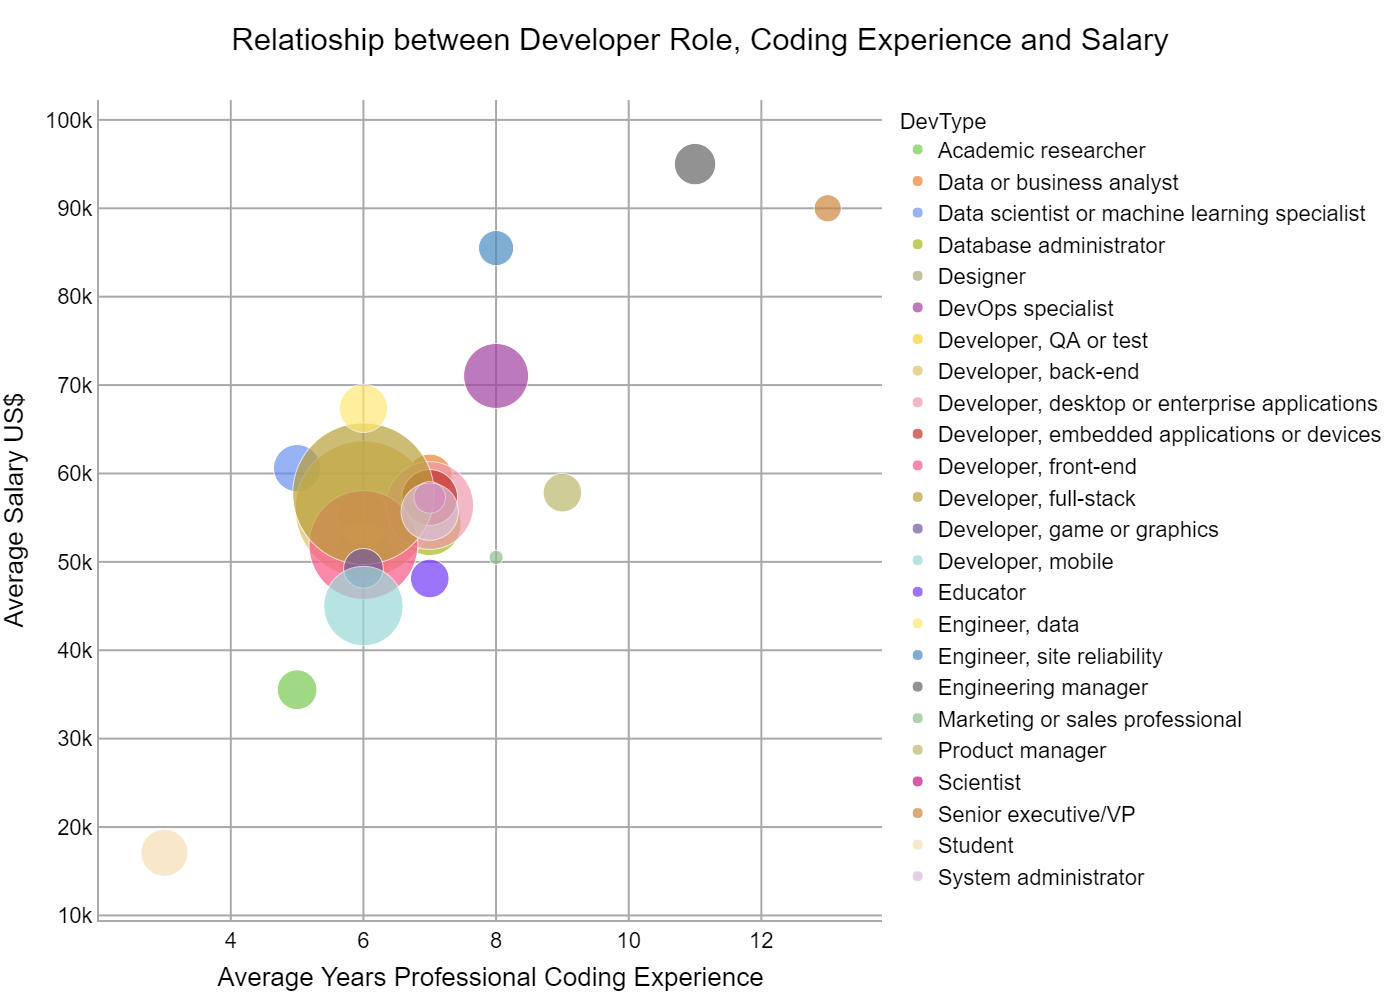

In [41]:
fig = px.scatter(
    prof_code_sal_group,
    x="YearsCodePro",
    y="ConvertedComp",
    title='Relatioship between Developer Role, Coding Experience and Salary',
    color='DevType',
    color_discrete_map=color_map_dic,
    size='Respondent',
    size_max=100
)

fig.update_layout(title_x=0.5, autosize=False, width=1400, height=1000, font=dict(family='Arial', size=22, color="black"), hovermode='closest', paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)')

fig.update_xaxes(showline=True, linewidth=2, linecolor='darkgray', showgrid=True, gridwidth=2, gridcolor='darkgray', title_text='Average Years Professional Coding Experience')

fig.update_yaxes(showline=True, linewidth=2, linecolor='darkgray', showgrid=True, gridwidth=2, gridcolor='darkgray', title_text='Average Salary US$')

# For plotting interactive figure
# plt.show()

# For plotting static figure
img_bytes = fig.to_image(format="png", scale=1)
Image(img_bytes)

The bubble size denotes the number of repondents in this group.

## What is the Relationship of Organisation Size, Years of Coding Experience and Salary?

In [42]:
# Remove rows without data in 'OrgSize', 'YearsCodePro', 'ConvertedComp' columns
df_org_code_sal = df_prof_code.dropna(subset=['OrgSize', 'YearsCodePro', 'ConvertedComp'])

In [43]:
# Split each developer role for each individual repsondant into seperate rows
df_org_code_sal_stack = df_org_code_sal.set_index(['Respondent','YearsCodePro','ConvertedComp'])['OrgSize'].str.split(';', expand=True).stack().reset_index(['Respondent','YearsCodePro','ConvertedComp'])
# Rename columns
df_org_code_sal_stack.columns = ['Respondent','YearsCodePro','ConvertedComp','OrgSize']
df_org_code_sal_stack[:20]

,Respondent,YearsCodePro,ConvertedComp,OrgSize
0,4,0.0,61000.0,100 to 499 employees
0,9,4.0,95179.0,10 to 19 employees
0,10,10.0,13293.0,"10,000 or more employees"
0,13,8.0,90000.0,10 to 19 employees
0,14,2.0,57060.0,100 to 499 employees
0,16,3.0,455352.0,100 to 499 employees
0,17,2.0,65277.0,20 to 99 employees
0,19,13.0,31140.0,100 to 499 employees
0,22,18.0,103000.0,"10,000 or more employees"
0,23,1.0,69000.0,"10,000 or more employees"


In [44]:
# Create data frame with number of respondents, median years professional coding experience and median salary grouped by developer type
org_code_sal_group = df_org_code_sal_stack.groupby(['OrgSize']).agg({
    'Respondent': 'count',
    'YearsCodePro': 'median',
    'ConvertedComp': 'median'}).reset_index()
org_code_sal_group

,OrgSize,Respondent,YearsCodePro,ConvertedComp
0,"1,000 to 4,999 employees",5163,6.0,67608.0
1,10 to 19 employees,4938,5.0,41871.0
2,"10,000 or more employees",6749,6.0,83640.0
3,100 to 499 employees,9225,6.0,59376.0
4,2-9 employees,5009,5.0,37810.0
5,20 to 99 employees,11212,5.0,50000.0
6,"5,000 to 9,999 employees",2005,6.0,69000.0
7,500 to 999 employees,3191,6.0,60891.0
8,"Just me - I am a freelancer, sole proprietor, etc.",2074,10.0,62808.0


In [45]:
# Replace the long description for freelancer with shorter description
org_code_sal_group.loc[org_code_sal_group['OrgSize']=='Just me - I am a freelancer, sole proprietor, etc.',['OrgSize']] = 'Freelancer'
org_code_sal_group

,OrgSize,Respondent,YearsCodePro,ConvertedComp
0,"1,000 to 4,999 employees",5163,6.0,67608.0
1,10 to 19 employees,4938,5.0,41871.0
2,"10,000 or more employees",6749,6.0,83640.0
3,100 to 499 employees,9225,6.0,59376.0
4,2-9 employees,5009,5.0,37810.0
5,20 to 99 employees,11212,5.0,50000.0
6,"5,000 to 9,999 employees",2005,6.0,69000.0
7,500 to 999 employees,3191,6.0,60891.0
8,Freelancer,2074,10.0,62808.0


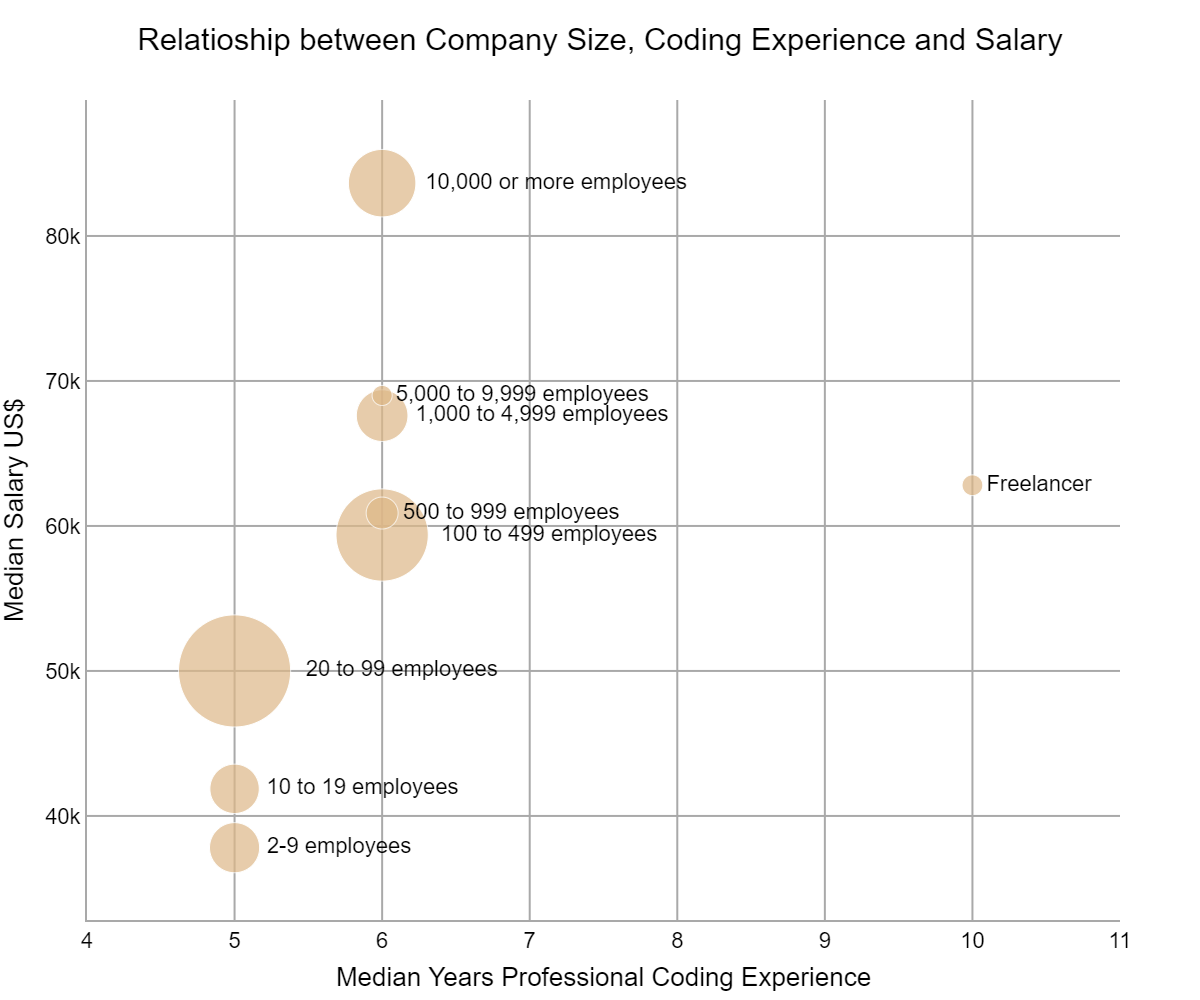

In [46]:
# Define data
trace = go.Scatter(x=org_code_sal_group['YearsCodePro'], y=org_code_sal_group['ConvertedComp'], mode='markers+text', text=org_code_sal_group['OrgSize'], textposition='middle right', name='Markers and Text', marker=dict(size=org_code_sal_group['Respondent'] / 100, color='burlywood'))
data = [trace]
# Define layout
layout = go.Layout(autosize=False, width=1200, height=1000,
    title=dict(text= 'Relatioship between Company Size, Coding Experience and Salary', x=0.5),
    xaxis=dict(title='Median Years Professional Coding Experience', showline=True, linewidth=2, linecolor='darkgray',           showgrid=True, gridwidth=2, gridcolor='darkgray', range=[4,11]),
    yaxis=dict(title='Median Salary US$', showline=True, linewidth=2, linecolor='darkgray', showgrid=True, gridwidth=2,         gridcolor='darkgray'), hovermode='closest', paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)',
    font=dict(
        family="Arial",
        size=22,
        color="black"
    ))
# Define figure and plot
fig = go.Figure(data=data, layout=layout)

# For plotting interactive figure
# plt.show()

# For plotting static figure
img_bytes = fig.to_image(format="png", scale=1)
Image(img_bytes)

The bubble size denotes the number of repondents in this group.

## What is the Proportion of Age Groups among Professional Developers?

In [47]:
# Define five year age bins and count the number of professional developers in each bin
df_age = df_prof['Respondent'].groupby(pd.cut(
    df_prof['Age'],
    [0,15,20,25,30,35,40,45,50,55,60,100],
    labels = ['Younger than 15 years', '15 to 19 years', '20 to 24 years', '25 to 29 years', '30 to 34 years', '35 to 39 years', '40 to 44 years', '45 to 49 years', '50 to 54 years', '55 to 59 years', '60 years and older'],
    right=False)
    ).count().reset_index()
df_age

,Age,Respondent
0,Younger than 15 years,34
1,15 to 19 years,708
2,20 to 24 years,10888
3,25 to 29 years,18758
4,30 to 34 years,13111
5,35 to 39 years,7842
6,40 to 44 years,3941
7,45 to 49 years,2026
8,50 to 54 years,1219
9,55 to 59 years,663


In [48]:
# Add column with percentage of the number of prefessional developers in each age group relative to the number of all developers
df_age['Age_pc'] = round((df_age['Respondent'] * 100) / df_age['Respondent'].sum(axis=0), 1)
df_age

,Age,Respondent,Age_pc
0,Younger than 15 years,34,0.1
1,15 to 19 years,708,1.2
2,20 to 24 years,10888,18.2
3,25 to 29 years,18758,31.4
4,30 to 34 years,13111,22.0
5,35 to 39 years,7842,13.1
6,40 to 44 years,3941,6.6
7,45 to 49 years,2026,3.4
8,50 to 54 years,1219,2.0
9,55 to 59 years,663,1.1


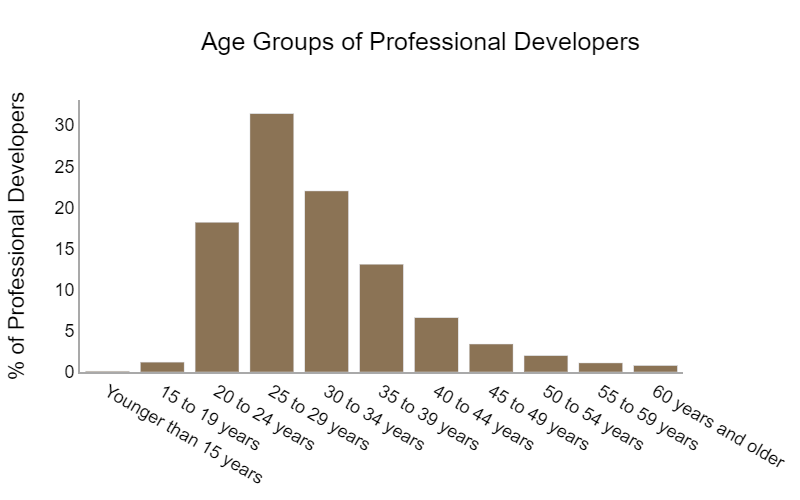

In [50]:
# Barplot for proportion of age groups among professional developers

# Define data
trace = go.Bar(y=df_age['Age_pc'], x=df_age['Age'], marker_color='#8B7355')
data = [trace]
# Define layout
layout = go.Layout(autosize=False, width=800, height=500,
    title=dict(text= 'Age Groups of Professional Developers', x=0.8),
    xaxis=dict(showline=True, linewidth=2, linecolor='darkgray', showgrid=False),
    yaxis=dict(title='% of Professional Developers', showline=True, linewidth=2, linecolor='darkgray', showgrid=False),
    hovermode='closest', paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)',
    font=dict(
        family="Arial",
        size=18,
        color="black"
    ))
# Define figure and plot
fig = go.Figure(data=data, layout=layout)

# For plotting interactive figure
# plt.show()

# For plotting static figure
img_bytes = fig.to_image(format="png", scale=1)
Image(img_bytes)

## What is the most Popular Other Developing Tool Among Python Developers?

In [51]:
# Remove rows with NaN in LanguageWorkedWith column
df_drop = df_prof.dropna(subset = ['LanguageWorkedWith'])
df_drop.shape

(65274, 85)

In [52]:
# Select only developers which have used Python
lang_used = df_drop[df_drop['LanguageWorkedWith'].str.contains('Python')]
lang_used.shape

(24285, 85)

In [53]:
# Create df with each language used in a seperate row by developer
lang_used_stack = pd.DataFrame(lang_used['LanguageWorkedWith'].str.split(';').tolist()).stack().reset_index()
lang_used_stack.head()

,level_0,level_1,0
0,0,0,C
1,0,1,C++
2,0,2,C#
3,0,3,Python
4,0,4,SQL


In [54]:
# Remove rows with Python because I'm only interested in other languages
lang_used_stack = lang_used_stack[lang_used_stack[0] != 'Python']
lang_used_stack.head()

,level_0,level_1,0
0,0,0,C
1,0,1,C++
2,0,2,C#
4,0,4,SQL
5,1,0,C++


In [55]:
# Count number of languages used and convert to percent
lang_used_cnt = round(lang_used_stack[0].value_counts(normalize=True).sort_values(ascending=False) * 100, 1)
lang_used_cnt

JavaScript               13.5
HTML/CSS                 12.0
SQL                      11.4
Bash/Shell/PowerShell    10.1
Java                      8.5
C++                       5.9
C                         5.1
C#                        5.1
PHP                       4.9
TypeScript                4.3
Go                        2.8
Ruby                      2.2
Other(s):                 1.7
R                         1.7
Assembly                  1.5
Kotlin                    1.5
Swift                     1.3
Scala                     1.3
Objective-C               1.1
Rust                      1.0
VBA                       0.9
Dart                      0.5
Clojure                   0.4
Elixir                    0.4
WebAssembly               0.3
Erlang                    0.3
F#                        0.2
Name: 0, dtype: float64

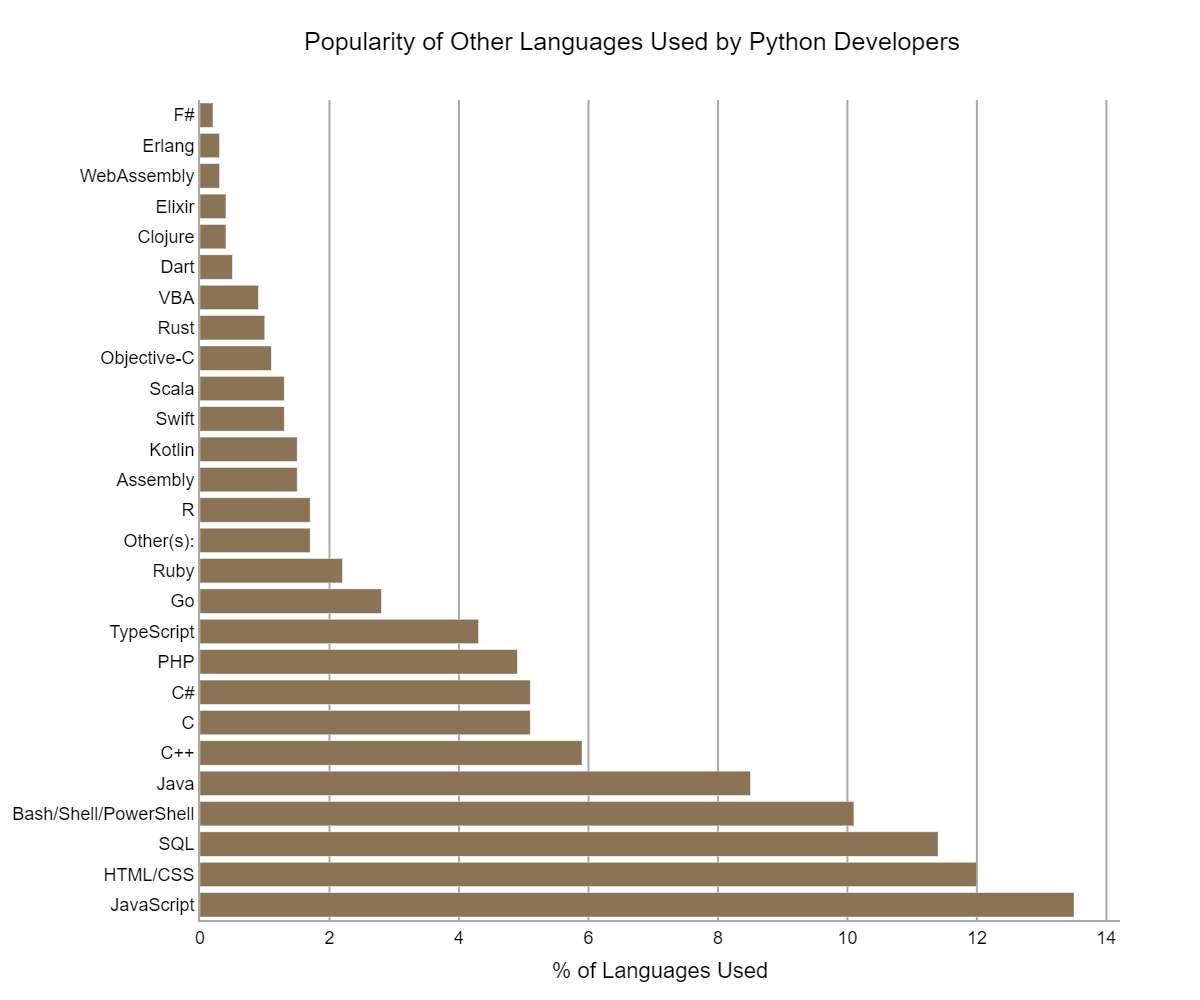

In [56]:
# Define data
trace = go.Bar(x=lang_used_cnt, y=lang_used_cnt.index, marker_color='#8B7355', orientation='h')
data = [trace]
# Define layout
layout = go.Layout(autosize=False, width=1200, height=1000,
    title=dict(text= 'Popularity of Other Languages Used by Python Developers', x=0.8),
    xaxis=dict(title='% of Languages Used', showline=True, linewidth=2, linecolor='darkgray', showgrid=True, gridwidth=2, gridcolor='darkgray'),
    yaxis=dict(showline=True, linewidth=2, linecolor='darkgray', showgrid=False),
    hovermode='closest', paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)',
    font=dict(
        family="Arial",
        size=18,
        color="black"
    ))
# Define figure and plot
fig = go.Figure(data=data, layout=layout)

# For plotting interactive figure
# plt.show()

# For plotting static figure
img_bytes = fig.to_image(format="png", scale=1)
Image(img_bytes)

## What are the Countries in which Python is Most Popular?

In [57]:
# Add helper column indicating whether a developer has worked with Python
df_drop['Python_worked'] = np.where(df_drop['LanguageWorkedWith'].str.contains('Python'), 1, 0)
df_drop[['Country', 'LanguageWorkedWith', 'Python_worked']]

,Country,LanguageWorkedWith,Python_worked
3,United States,C;C++;C#;Python;SQL,1
4,Ukraine,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,1
6,Ukraine,HTML/CSS;JavaScript,0
8,New Zealand,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;Python;Ruby;Rust;SQL;TypeScript;WebAssembly;Other(s):,1
9,India,C#;Go;JavaScript;Python;R;SQL,1
...,...,...,...
88325,United States,HTML/CSS;JavaScript;Scala;TypeScript,0
88326,Finland,Bash/Shell/PowerShell;C++;Python,1
88328,Austria,Bash/Shell/PowerShell;Go;HTML/CSS;Java;JavaScript;Python,1
88329,Netherlands,C#;HTML/CSS;Java;JavaScript;PHP;Python,1


In [58]:
# Create table with total number of respondants and respondents who have used Python per country
Python_count = pd.pivot_table(df_drop, index='Country', values=['LanguageWorkedWith', 'Python_worked'], aggfunc={'LanguageWorkedWith': 'size', 'Python_worked': sum}).reset_index()
Python_count.sort_values(by=['Python_worked'], ascending=False)[:10]

,Country,LanguageWorkedWith,Python_worked
161,United States,16040,7132
67,India,6553,1948
159,United Kingdom,4439,1599
56,Germany,4228,1548
29,Canada,2494,1043
53,France,1751,690
22,Brazil,1508,557
118,Poland,1481,535
8,Australia,1421,525
124,Russian Federation,1301,495


In [59]:
Python_count.shape

(169, 3)

In [60]:
# Retain countries with 50 or more respondents
Python_count = Python_count[Python_count['LanguageWorkedWith'] >= 50]
Python_count.shape

(84, 3)

In [61]:
# Add column with percent of people who worked with Python of total respondants
Python_count['pc_python'] = round(((Python_count['Python_worked'] / Python_count['LanguageWorkedWith']) * 100), 2)
Python_count = Python_count.sort_values(by = ['pc_python', 'Python_worked'], ascending = False)
Python_count.head(10)

,Country,LanguageWorkedWith,Python_worked,pc_python
156,Uganda,56,39,69.64
52,Finland,413,195,47.22
137,South Korea,100,47,47.00
72,Israel,766,350,45.69
143,Switzerland,696,312,44.83
78,Kenya,137,61,44.53
161,United States,16040,7132,44.46
75,Japan,306,135,44.12
145,Taiwan,125,55,44.00
32,Chile,149,65,43.62


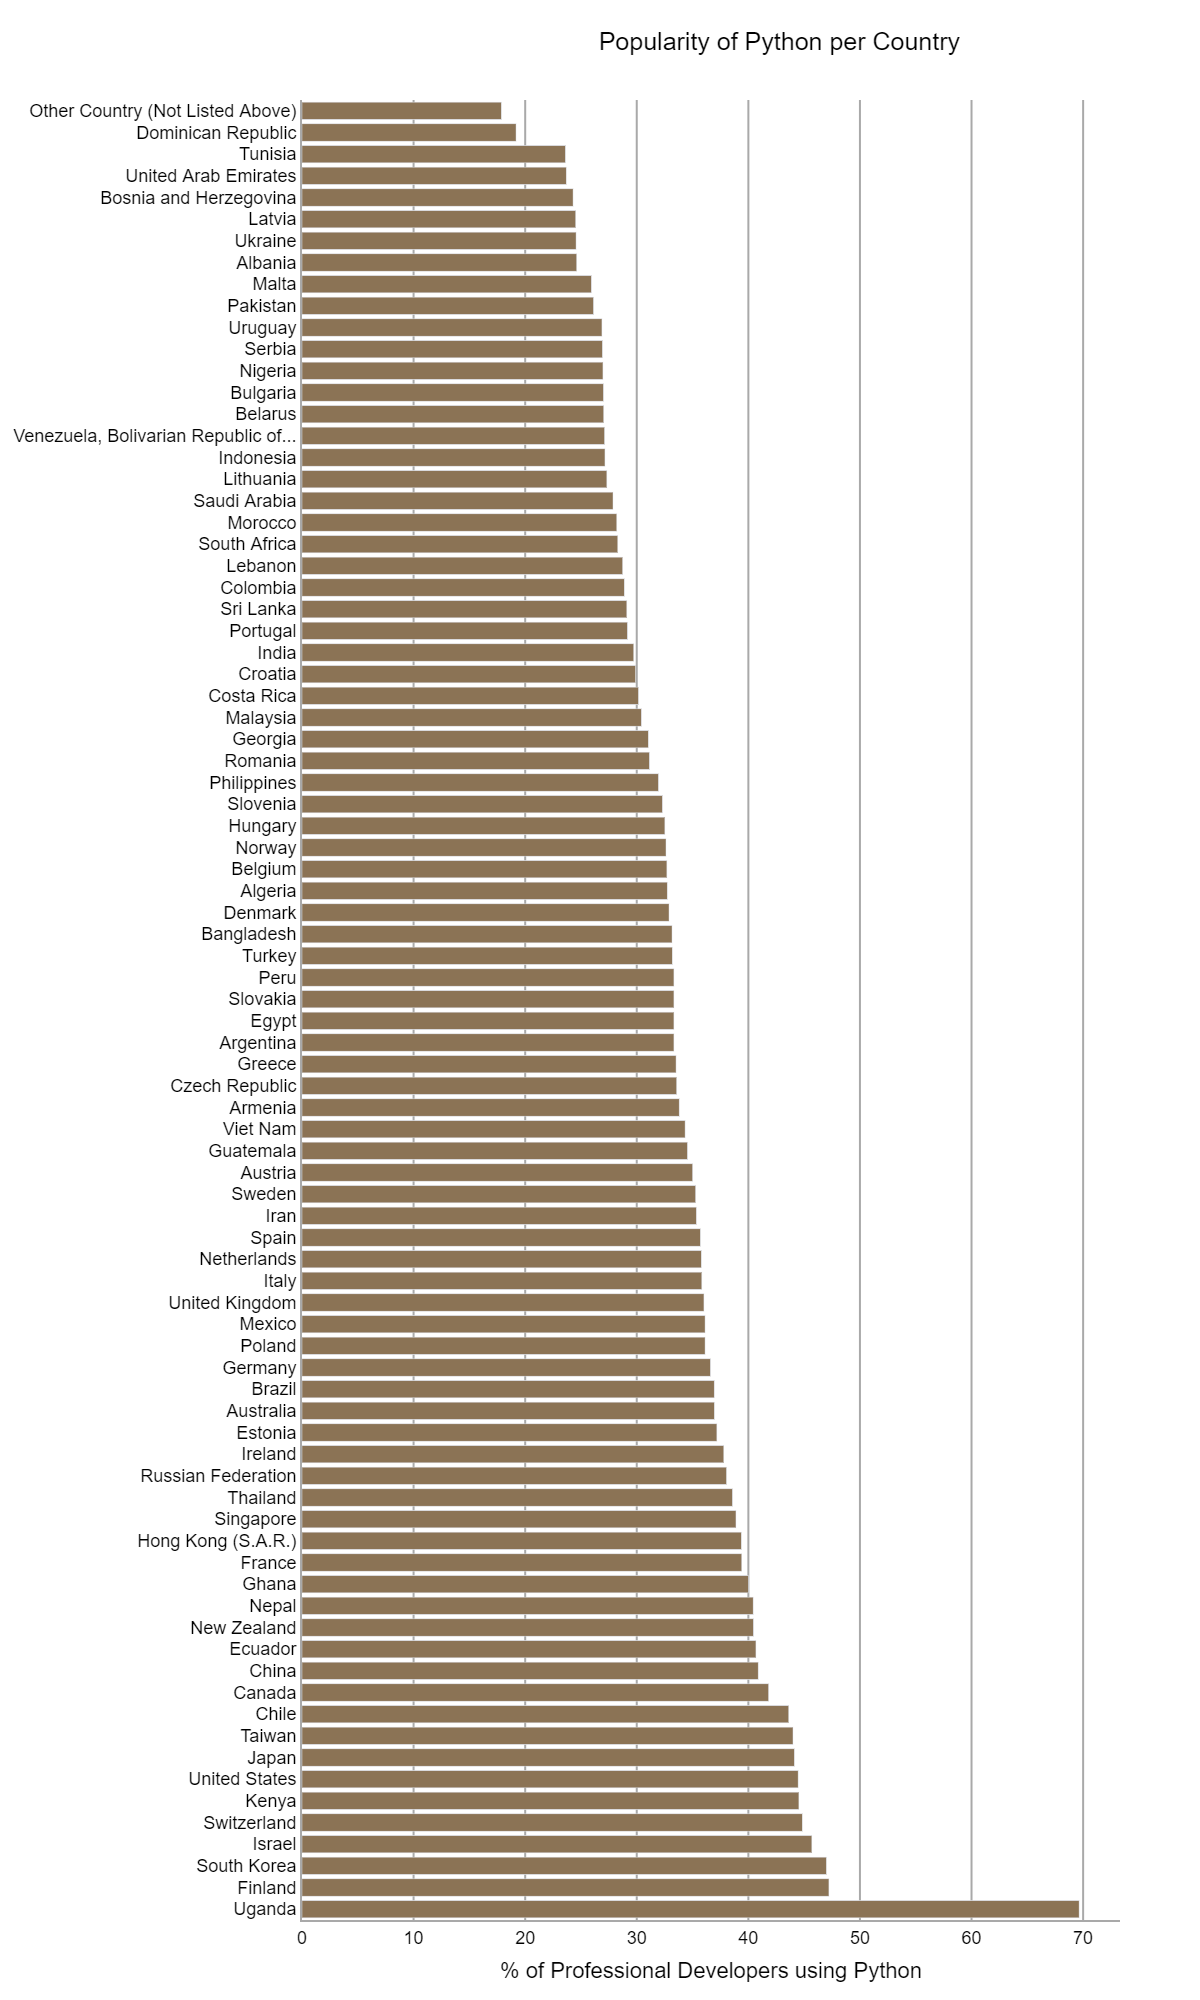

In [62]:
# Define data
trace = go.Bar(x=Python_count['pc_python'], y=Python_count['Country'], marker_color='#8B7355', orientation='h')
data = [trace]
# Define layout
layout = go.Layout(autosize=False, width=1200, height=2000,
    title=dict(text= 'Popularity of Python per Country', x=0.8),
    xaxis=dict(title='% of Professional Developers using Python', showline=True, linewidth=2, linecolor='darkgray', showgrid=True, gridwidth=2, gridcolor='darkgray'),
    yaxis=dict(showline=True, linewidth=2, linecolor='darkgray', showgrid=False),
    hovermode='closest', paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)',
    font=dict(
        family="Arial",
        size=18,
        color="black"
    ))
# Define figure and plot
fig = go.Figure(data=data, layout=layout)

# For plotting interactive figure
# plt.show()

# For plotting static figure
img_bytes = fig.to_image(format="png", scale=1)
Image(img_bytes)

## What are the Countries with the Highest Level of Coding Experience?

In [63]:
# Check if NaN in 'YearsCodePro' column
df_prof_code['YearsCodePro'].isna().any()

True

In [64]:
# Remove rows without data in 'YearsCodePro' column
df_prof_exp = df_prof_code.dropna(subset=['YearsCodePro'])

In [65]:
# Add columns with average years coding experice per country
country_exp = df_prof_exp.groupby(['Country'])['YearsCodePro'].agg(Respondents = 'count', Years_coding_mean = 'mean', Years_coding_median = 'median').sort_values(by = 'Years_coding_mean', ascending = False).reset_index()
country_exp.sort_values(by=['Years_coding_median'], ascending=False)[:10]

,Country,Respondents,Years_coding_mean,Years_coding_median
0,Democratic People's Republic of Korea,2,33.000000,33.0
1,Gabon,1,25.000000,25.0
2,Monaco,3,17.000000,14.0
3,Andorra,3,17.000000,14.0
5,Guinea,2,13.500000,13.5
6,Benin,2,12.000000,12.0
9,Mali,1,10.000000,10.0
8,Australia,1423,10.748419,9.0
13,Luxembourg,48,9.875000,9.0
7,Oman,4,11.500000,9.0


In [66]:
country_exp.shape

(169, 4)

In [67]:
# Retain countries with 50 or more respondents
country_exp = country_exp[country_exp['Respondents'] >= 50]
country_exp.shape

(84, 4)

In [68]:
# Sort df on median years coding experience
country_exp = country_exp.sort_values(by=['Years_coding_median'], ascending=False)
country_exp[:10]

,Country,Respondents,Years_coding_mean,Years_coding_median
8,Australia,1423,10.748419,9.0
22,Norway,419,9.069212,7.0
38,Austria,576,8.267361,7.0
37,Costa Rica,62,8.274194,7.0
32,Argentina,435,8.416092,7.0
54,Slovakia,169,7.426036,7.0
29,Ecuador,59,8.677966,7.0
27,Israel,759,8.710145,7.0
23,Thailand,126,9.015873,7.0
24,Switzerland,696,8.946839,7.0


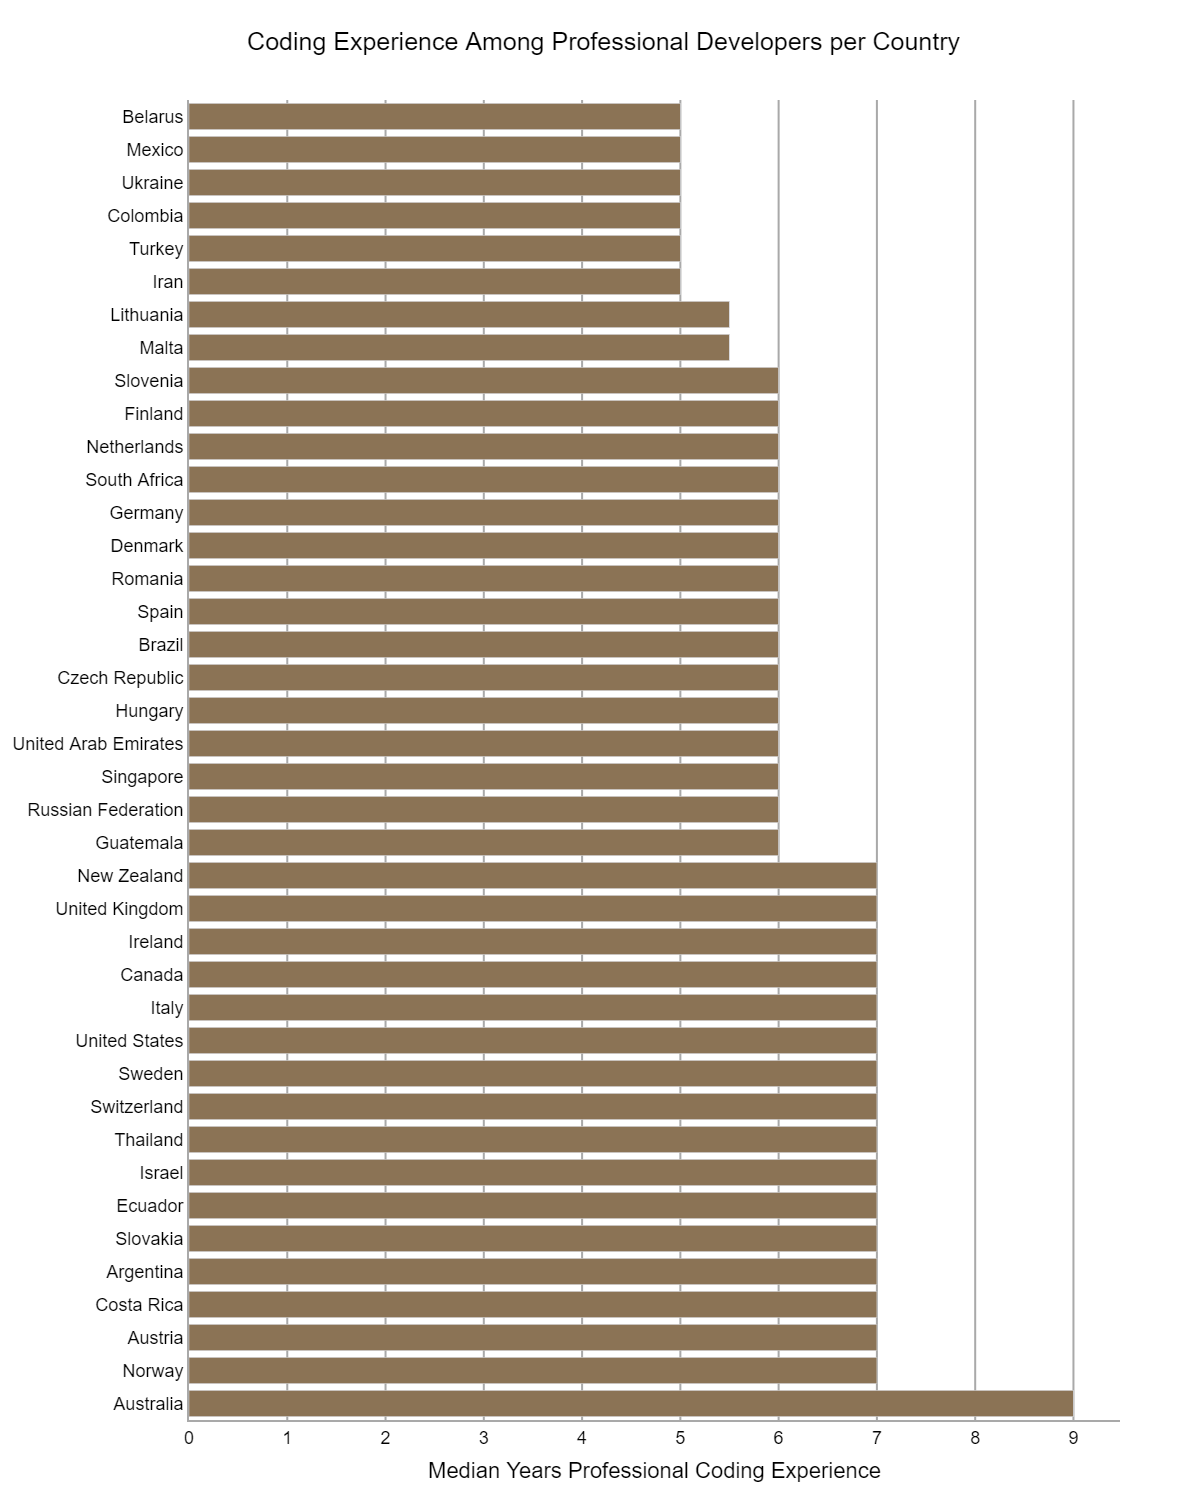

In [69]:
# Barplot with median years coding experience for the top 40 countries

# Define data
trace = go.Bar(x=country_exp['Years_coding_median'][:40], y=country_exp['Country'][:40], marker_color='#8B7355', orientation='h')
data = [trace]
# Define layout
layout = go.Layout(autosize=False, width=1200, height=1500,
    title=dict(text= 'Coding Experience Among Professional Developers per Country', x=0.8),
    xaxis=dict(title='Median Years Professional Coding Experience', showline=True, linewidth=2, linecolor='darkgray', showgrid=True, gridwidth=2, gridcolor='darkgray'),
    yaxis=dict(showline=True, linewidth=2, linecolor='darkgray', showgrid=False),
    hovermode='closest', paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)',
    font=dict(
        family="Arial",
        size=18,
        color="black"
    ))
# Define figure and plot
fig = go.Figure(data=data, layout=layout)

# For plotting interactive figure
# plt.show()

# For plotting static figure
img_bytes = fig.to_image(format="png", scale=1)
Image(img_bytes)

## What are the Most Common Developer Roles Among Professional Developers? 

In [70]:
# Create df with each developer role in a seperate row by developer
deftype_stack = pd.DataFrame(df_prof['DevType'].dropna().str.split(';').tolist()).stack()

In [71]:
# Count number of developer types used and convert to percent
devtype_cnt = round(deftype_stack.value_counts(normalize=True).sort_values(ascending=False) * 100, 1)
devtype_cnt

Developer, full-stack                            18.7
Developer, back-end                              17.5
Developer, front-end                             11.3
Developer, desktop or enterprise applications     7.4
Developer, mobile                                 6.2
Database administrator                            3.8
DevOps specialist                                 3.7
Designer                                          3.3
System administrator                              3.1
Developer, embedded applications or devices       3.0
Developer, QA or test                             2.6
Student                                           2.3
Engineer, data                                    2.2
Data scientist or machine learning specialist     2.1
Data or business analyst                          2.0
Academic researcher                               1.7
Developer, game or graphics                       1.6
Engineering manager                               1.6
Educator                    

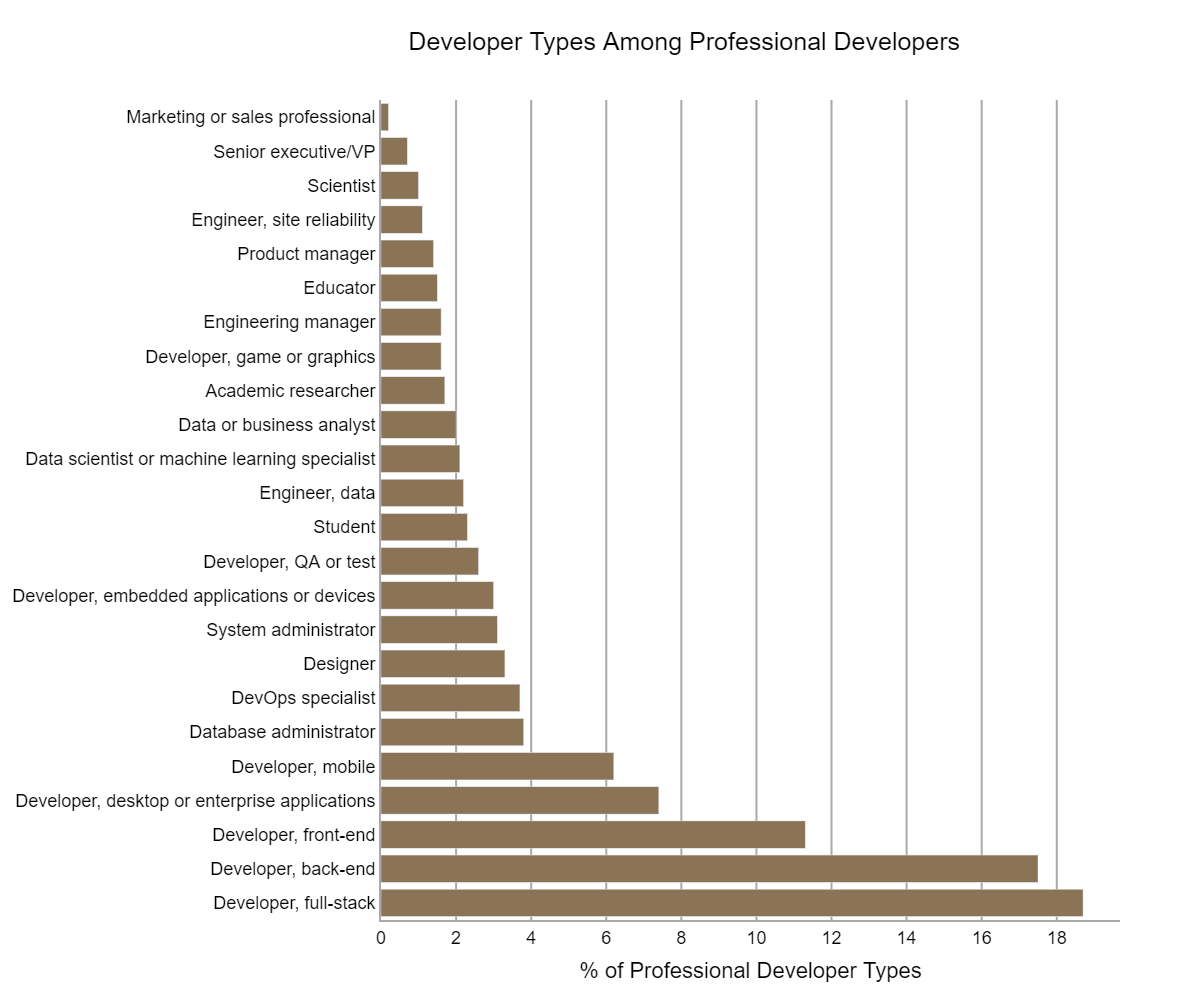

In [72]:
# Define data
trace = go.Bar(x=devtype_cnt, y=devtype_cnt.index, marker_color='#8B7355', orientation='h')
data = [trace]
# Define layout
layout = go.Layout(autosize=False, width=1200, height=1000,
    title=dict(text= 'Developer Types Among Professional Developers', x=0.8),
    xaxis=dict(title='% of Professional Developer Types', showline=True, linewidth=2, linecolor='darkgray', showgrid=True, gridwidth=2, gridcolor='darkgray'),
    yaxis=dict(showline=True, linewidth=2, linecolor='darkgray', showgrid=False),
    hovermode='closest', paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)',
    font=dict(
        family="Arial",
        size=18,
        color="black"
    ))
# Define figure and plot
fig = go.Figure(data=data, layout=layout)

# For plotting interactive figure
# plt.show()

# For plotting static figure
img_bytes = fig.to_image(format="png", scale=1)
Image(img_bytes)